In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# 1. Download the MenuItem dataset

In [3]:
read_pd=pd.read_csv('/content/drive/MyDrive/food_world/Food_Word_Embedding_and_Clustering_Task/MenuItem.csv')

### Visualized the MenuItem.csv

In [4]:
read_pd

,Restaurant Name,Original food Item
0,Coffee Time,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack
2,Weight Watchers,Muffins
3,Natural Sea,"Albacore Tuna, Solid White"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak
...,...,...
4519,Moxie's Classic Grill,Spring Mix Starter Salad
4520,Thundercloud Subs,"Genoa Salami Low-Fat Sub, Large"
4521,Chick-fil-A,"Cookies & Cream Milkshake, Small"
4522,Cereality,2% Milk


# 2. Perform any data preprocessing,

### Text Preprocessing: remove punction, put text into lowercase, tokenization, remove stopwords

In [5]:
# remove punction
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
read_pd['after_punction_removing']= read_pd['Original food Item'].apply(lambda x:remove_punctuation(x))
read_pd.head()

,Restaurant Name,Original food Item,after_punction_removing
0,Coffee Time,Garden Vegetable Sandwich,Garden Vegetable Sandwich
1,HoSan,Roasted Seaweed Snack,Roasted Seaweed Snack
2,Weight Watchers,Muffins,Muffins
3,Natural Sea,"Albacore Tuna, Solid White",Albacore Tuna Solid White
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,Caesar Salad with Grilled Flat Iron Steak


In [6]:
#Lowering the text: 
read_pd['after_lower']= read_pd['after_punction_removing'].apply(lambda x: x.lower())
read_pd.head()

,Restaurant Name,Original food Item,after_punction_removing,after_lower
0,Coffee Time,Garden Vegetable Sandwich,Garden Vegetable Sandwich,garden vegetable sandwich
1,HoSan,Roasted Seaweed Snack,Roasted Seaweed Snack,roasted seaweed snack
2,Weight Watchers,Muffins,Muffins,muffins
3,Natural Sea,"Albacore Tuna, Solid White",Albacore Tuna Solid White,albacore tuna solid white
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,Caesar Salad with Grilled Flat Iron Steak,caesar salad with grilled flat iron steak


In [7]:
#tokenization
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('\W',text)
    return tokens
#applying function to the column
read_pd['after_tokenization']= read_pd['after_lower'].apply(lambda x: tokenization(x))
read_pd.head()

,Restaurant Name,Original food Item,after_punction_removing,after_lower,after_tokenization
0,Coffee Time,Garden Vegetable Sandwich,Garden Vegetable Sandwich,garden vegetable sandwich,"[garden, vegetable, sandwich]"
1,HoSan,Roasted Seaweed Snack,Roasted Seaweed Snack,roasted seaweed snack,"[roasted, seaweed, snack]"
2,Weight Watchers,Muffins,Muffins,muffins,[muffins]
3,Natural Sea,"Albacore Tuna, Solid White",Albacore Tuna Solid White,albacore tuna solid white,"[albacore, tuna, solid, white]"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,Caesar Salad with Grilled Flat Iron Steak,caesar salad with grilled flat iron steak,"[caesar, salad, with, grilled, flat, iron, steak]"


In [8]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwordslist=stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwordslist]
    return output
#applying the function
read_pd['after_stopword_removing']= read_pd['after_tokenization'].apply(lambda x:remove_stopwords(x))
read_pd.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Restaurant Name,Original food Item,after_punction_removing,after_lower,after_tokenization,after_stopword_removing
0,Coffee Time,Garden Vegetable Sandwich,Garden Vegetable Sandwich,garden vegetable sandwich,"[garden, vegetable, sandwich]","[garden, vegetable, sandwich]"
1,HoSan,Roasted Seaweed Snack,Roasted Seaweed Snack,roasted seaweed snack,"[roasted, seaweed, snack]","[roasted, seaweed, snack]"
2,Weight Watchers,Muffins,Muffins,muffins,[muffins],[muffins]
3,Natural Sea,"Albacore Tuna, Solid White",Albacore Tuna Solid White,albacore tuna solid white,"[albacore, tuna, solid, white]","[albacore, tuna, solid, white]"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,Caesar Salad with Grilled Flat Iron Steak,caesar salad with grilled flat iron steak,"[caesar, salad, with, grilled, flat, iron, steak]","[caesar, salad, grilled, flat, iron, steak]"


In [9]:
#Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
read_pd['after_Lemmatization']=read_pd['after_stopword_removing'].apply(lambda x:lemmatizer(x))
read_pd.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Restaurant Name,Original food Item,after_punction_removing,after_lower,after_tokenization,after_stopword_removing,after_Lemmatization
0,Coffee Time,Garden Vegetable Sandwich,Garden Vegetable Sandwich,garden vegetable sandwich,"[garden, vegetable, sandwich]","[garden, vegetable, sandwich]","[garden, vegetable, sandwich]"
1,HoSan,Roasted Seaweed Snack,Roasted Seaweed Snack,roasted seaweed snack,"[roasted, seaweed, snack]","[roasted, seaweed, snack]","[roasted, seaweed, snack]"
2,Weight Watchers,Muffins,Muffins,muffins,[muffins],[muffins],[muffin]
3,Natural Sea,"Albacore Tuna, Solid White",Albacore Tuna Solid White,albacore tuna solid white,"[albacore, tuna, solid, white]","[albacore, tuna, solid, white]","[albacore, tuna, solid, white]"
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,Caesar Salad with Grilled Flat Iron Steak,caesar salad with grilled flat iron steak,"[caesar, salad, with, grilled, flat, iron, steak]","[caesar, salad, grilled, flat, iron, steak]","[caesar, salad, grilled, flat, iron, steak]"


# 3. Train an embedding model:

### Embedding with pretrained-BERT

In [10]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#Use pretrained BERT model
from simpletransformers.language_representation import RepresentationModel
sentences=read_pd['Original food Item'].to_list()
model=RepresentationModel(
    model_type="bert",
    model_name="bert-base-uncased",
    use_cuda=True
)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
#change all 4524 sentences of the Original food Item to vector
sentence_vectors=model.encode_sentences(sentences,combine_strategy="mean")
sentence_vectors

array([[ 0.09279425, -0.19485594, -0.3098778 , ..., -0.33701712,
         0.37239718, -0.8109088 ],
       [ 0.09279425, -0.19485594, -0.3098778 , ..., -0.33701712,
         0.37239718, -0.8109088 ],
       [-0.43964213, -0.00540059,  0.08982761, ..., -0.04976237,
         0.23784788, -0.08274386],
       ...,
       [ 0.20690112,  0.21047485,  0.53565407, ..., -0.25042146,
         0.37773624, -0.35073075],
       [-0.28466642, -0.03760362, -0.23486046, ...,  0.16040626,
         0.21626277,  0.13384634],
       [-0.20049046, -0.16202179, -0.22805512, ..., -0.27831587,
         0.22131948, -0.4256384 ]], dtype=float32)

In [13]:
len(sentence_vectors)

4524

In [14]:
#list_sentence=sentence_vectors.tolist()

### Dimension Reduction

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sentence_vectors = StandardScaler().fit_transform(sentence_vectors)

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
sv_pca = pca.fit_transform(sentence_vectors)


In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.09887558e-01, 1.62406698e-01, 1.07726671e-01, 7.27221519e-02,
       5.94879240e-02, 3.70961204e-02, 2.42279284e-02, 2.02130508e-02,
       1.45636462e-02, 1.34933405e-02, 1.17488373e-02, 1.04434742e-02,
       9.67831723e-03, 8.11564550e-03, 7.02655874e-03, 6.64859079e-03,
       5.74886287e-03, 5.52679645e-03, 4.81099030e-03, 4.67207842e-03,
       4.14154725e-03, 4.00833460e-03, 3.74520011e-03, 3.34023545e-03,
       3.25102382e-03, 2.97328201e-03, 2.88675493e-03, 2.66549503e-03,
       2.54709809e-03, 2.46080803e-03, 2.36421521e-03, 2.20509619e-03,
       2.04348983e-03, 2.02113879e-03, 1.93797436e-03, 1.80783879e-03,
       1.69474795e-03, 1.60166679e-03, 1.54090847e-03, 1.38284301e-03,
       1.34369277e-03, 1.28782634e-03, 1.22395810e-03, 1.15989312e-03,
       1.15088199e-03, 1.08764344e-03, 1.05873472e-03, 1.03741081e-03,
       1.01082702e-03, 9.80744720e-04, 9.20275401e-04, 9.00767336e-04,
       8.67593917e-04, 8.59756721e-04, 8.43205489e-04, 8.02179973e-04,
      

In [19]:
new_pca = PCA(n_components=2)
sv_new_pca = new_pca.fit_transform(sentence_vectors)

In [20]:
sv_new_pca

array([[-18.883936 ,   3.4261813],
       [-18.883917 ,   3.42616  ],
       [  6.249431 ,  28.153854 ],
       ...,
       [ 20.994846 ,   0.5484839],
       [ 19.075844 ,  28.554462 ],
       [ -1.0171016,   7.404082 ]], dtype=float32)

# 4. Cluster semantically similar ingredients / restaurant brands:

### I use the k_means with the metric elbow method to choose the best k for k-mean

In [21]:
# set clusters to 10 ( To start with as a test )
k_clusters = 10


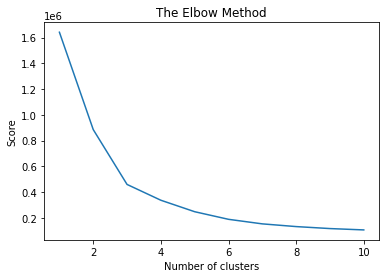

In [22]:
#find the best number of cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(sv_new_pca)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

### Find the num of cluster is 3

In [23]:
k_clusters = 3

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(sv_new_pca)

KMeans(max_iter=600, n_clusters=3, random_state=0, tol=1e-06)

In [24]:
clusters = model.predict(sv_new_pca)

In [25]:
# Create a new column to display the predicted result
read_pd["Cluster_(K=3)"] = clusters
read_pd.head()

,Restaurant Name,Original food Item,after_punction_removing,after_lower,after_tokenization,after_stopword_removing,after_Lemmatization,Cluster_(K=3)
0,Coffee Time,Garden Vegetable Sandwich,Garden Vegetable Sandwich,garden vegetable sandwich,"[garden, vegetable, sandwich]","[garden, vegetable, sandwich]","[garden, vegetable, sandwich]",1
1,HoSan,Roasted Seaweed Snack,Roasted Seaweed Snack,roasted seaweed snack,"[roasted, seaweed, snack]","[roasted, seaweed, snack]","[roasted, seaweed, snack]",1
2,Weight Watchers,Muffins,Muffins,muffins,[muffins],[muffins],[muffin],0
3,Natural Sea,"Albacore Tuna, Solid White",Albacore Tuna Solid White,albacore tuna solid white,"[albacore, tuna, solid, white]","[albacore, tuna, solid, white]","[albacore, tuna, solid, white]",2
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,Caesar Salad with Grilled Flat Iron Steak,caesar salad with grilled flat iron steak,"[caesar, salad, with, grilled, flat, iron, steak]","[caesar, salad, grilled, flat, iron, steak]","[caesar, salad, grilled, flat, iron, steak]",1


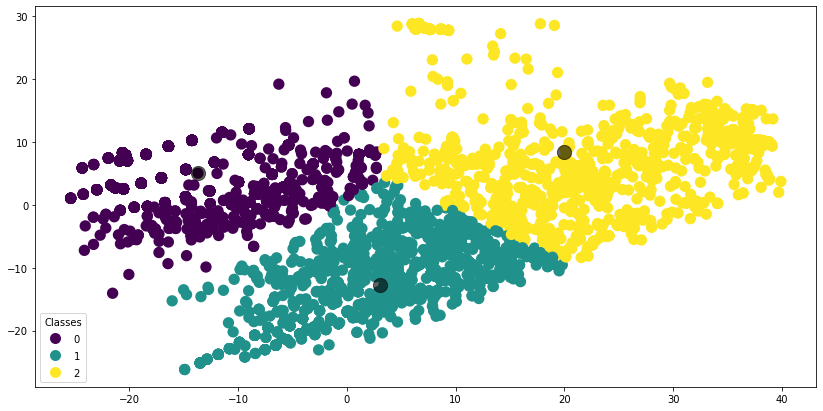

In [26]:
#Visualization the cluster
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(sv_new_pca)
prediction = kmeans.predict(sv_new_pca)
fig, ax = plt.subplots(figsize=(14, 7))
scatter = ax.scatter(sv_new_pca[:, 0], sv_new_pca[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
centers = fitted.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6)
plt.show()


# 5.Evaluating the clusters:

### check whether k=3 is the best with silhouette_score

In [27]:
#check whether k=3 is the best with silhouette_score
from sklearn.metrics import silhouette_score
#silhouette_score requires more than 1 cluster labels.
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(sv_new_pca)
    centers = clusterer.cluster_centers_

    score = silhouette_score(sv_new_pca, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.464456170797348
For n_clusters = 3, silhouette score is 0.5197877883911133
For n_clusters = 4, silhouette score is 0.5253522992134094
For n_clusters = 5, silhouette score is 0.5245320200920105
For n_clusters = 6, silhouette score is 0.4693165421485901
For n_clusters = 7, silhouette score is 0.45043134689331055
For n_clusters = 8, silhouette score is 0.43882882595062256
For n_clusters = 9, silhouette score is 0.4192987382411957
For n_clusters = 10, silhouette score is 0.4299352467060089


### From the silhouette_score, k=4 is the best cluster, I combine with cluster=4

In [28]:
k_clusters = 4

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(sv_new_pca)
clusters = model.predict(sv_new_pca)
# Create a new column to display the predicted result
read_pd["Cluster_(K=4)"] = clusters
read_pd.head()

,Restaurant Name,Original food Item,after_punction_removing,after_lower,after_tokenization,after_stopword_removing,after_Lemmatization,Cluster_(K=3),Cluster_(K=4)
0,Coffee Time,Garden Vegetable Sandwich,Garden Vegetable Sandwich,garden vegetable sandwich,"[garden, vegetable, sandwich]","[garden, vegetable, sandwich]","[garden, vegetable, sandwich]",1,2
1,HoSan,Roasted Seaweed Snack,Roasted Seaweed Snack,roasted seaweed snack,"[roasted, seaweed, snack]","[roasted, seaweed, snack]","[roasted, seaweed, snack]",1,2
2,Weight Watchers,Muffins,Muffins,muffins,[muffins],[muffins],[muffin],0,0
3,Natural Sea,"Albacore Tuna, Solid White",Albacore Tuna Solid White,albacore tuna solid white,"[albacore, tuna, solid, white]","[albacore, tuna, solid, white]","[albacore, tuna, solid, white]",2,1
4,World of Beer,Caesar Salad with Grilled Flat Iron Steak,Caesar Salad with Grilled Flat Iron Steak,caesar salad with grilled flat iron steak,"[caesar, salad, with, grilled, flat, iron, steak]","[caesar, salad, grilled, flat, iron, steak]","[caesar, salad, grilled, flat, iron, steak]",1,0


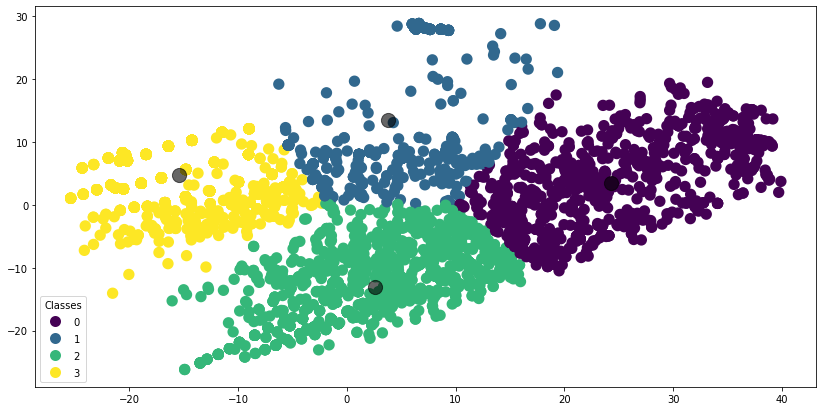

In [29]:
#Visualization the cluster
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(sv_new_pca)
prediction = kmeans.predict(sv_new_pca)
fig, ax = plt.subplots(figsize=(14, 7))
scatter = ax.scatter(sv_new_pca[:, 0], sv_new_pca[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
centers = fitted.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6)
plt.show()

### Summary for the Restaurant Name according to the 3-means cluster and 4-means cluster

In [35]:
# get restaurant name for 3-means cluster for each class
for i in range(0,3):
    print('class '+str(i)+': ',read_pd['Restaurant Name'][read_pd['Cluster_(K=3)']==i].values)

class 0:  ['Weight Watchers' 'Chick-fil-A' 'Port of Subs' ... 'Thundercloud Subs'
 'Chick-fil-A' 'Cereality']
class 1:  ['Coffee Time' 'HoSan' 'World of Beer' ... 'Boneheads'
 "Moxie's Classic Grill" 'The Habit Burger Grill']
class 2:  ['Natural Sea' 'Blimpie' 'TacoTime' ... 'KA-ME'
 "Whitey's Ice Cream Grocery" 'Safeway Select']


In [37]:
# get restaurant name for 4-means cluster for each class
for i in range(0,4):
    print('class '+str(i)+': ',read_pd['Restaurant Name'][read_pd['Cluster_(K=4)']==i].values)

class 0:  ['Weight Watchers' 'World of Beer' 'YoCream' 'Silver Mine Subs'
 'Tabatchnick' 'Duchess Shoppe' 'Pepperjax Grill' 'Taco Bueno'
 'A&W (Canada)' 'Mcmenamins' 'Roy Rogers Restaurants' 'Merzi' "Drew's"
 'Yogli Mogli' 'Baton Rouge Steakhouse & Bar' 'Yoshinoya' 'A&W (Canada)'
 'Kaizen' "Buddy's Bar-b-q" 'Roy Rogers Restaurants' 'Roti' 'Burrito Boyz'
 'Merzi' 'Merci' 'Frullati Cafe & Bakery' 'Purebread Deli' 'Chickpea'
 'Yogli Mogli' 'Tai Pei' 'Merzi' 'Vocelli Pizza' 'Sadaf' 'Taco Bueno'
 'Port of Subs' 'Merzi' 'Port of Subs' 'Kitchens Seafood' 'Yogli Mogli'
 'Boneheads' 'Vocelli Pizza' 'Tyson' 'The Hungry Hobo' "Mimi's Cafe"
 "Portillo's" "Whitey's Ice Cream Grocery" "Furr's Family Dining" 'Bimbo'
 'Merzi' 'Harris Teeter' 'Chick-fil-A' 'Tyson' 'Tabatchnick' 'Yogli Mogli'
 'White Spot Restaurants' "East Side Mario's" 'Back Yard Burgers'
 'Frullati Cafe & Bakery' "Sobey's" 'Montini' 'Taco Bueno' "Portillo's"
 "Moxie's Classic Grill" "Duke's" 'Taco Bueno'
 'Baton Rouge Steakhouse & Ba